In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

2025-09-28 17:41:48.079391: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-28 17:41:50.778255: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-28 17:41:55.573875: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
df = pd.read_csv("/home/rads-a-dev/Desktop/projects/ml_projects/seoul_bikes_project/data_folder/SeoulBikeData.csv", encoding="cp949")

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [5]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [8]:
print(df.dtypes)

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(캜)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(캜)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object


In [9]:
#updating date to the right format
df["Date"] = pd.to_datetime(df["Date"],format="mixed")

In [10]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8740,2018-11-30,116,4,-0.5,71,0.4,1345,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
8741,2018-11-30,149,5,-0.7,66,0.5,1336,-6.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
8742,2018-11-30,293,6,-0.8,68,0.8,1322,-5.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8743,2018-11-30,750,7,-1.2,70,0.8,1351,-5.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8744,2018-11-30,1527,8,-1.5,68,1.1,1286,-6.6,0.02,0.0,0.0,Autumn,No Holiday,Yes
8745,2018-11-30,809,9,-0.4,57,0.6,1270,-7.8,0.45,0.0,0.0,Autumn,No Holiday,Yes
8746,2018-11-30,554,10,1.9,51,0.8,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,Yes
8747,2018-11-30,642,11,5.3,43,1.8,1177,-6.2,1.38,0.0,0.0,Autumn,No Holiday,Yes
8748,2018-11-30,720,12,6.6,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes
8749,2018-11-30,740,13,7.1,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes


In [11]:
df.dtypes

Date                        datetime64[ns]
Rented Bike Count                    int64
Hour                                 int64
Temperature(캜)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature(캜)           float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Functioning Day                     object
dtype: object

In [12]:
df_column_names = df.columns

In [13]:
df_column_names

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
print(df.columns.tolist())


['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [15]:
df["Temperature"] = df["Temperature(캜)"]
df["Dew point temp"] = df["Dew point temperature(캜)"]
df.drop(columns=["Temperature(캜)", "Dew point temperature(캜)"], inplace=True)

In [16]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'Temperature',
       'Dew point temp'],
      dtype='object')

In [18]:
#changing  Functionind day to 1 for yes and 0 for no
df["Functioning Day"] = (df["Functioning Day"] == "Yes").astype(int)
df.sample(20)

,Date,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Temperature,Dew point temp
62,2017-03-12,563,14,76,1.2,422,0.69,0.0,0.0,Winter,No Holiday,1,7.6,3.6
5391,2018-07-13,1094,15,62,2.4,1806,1.91,0.0,0.0,Summer,No Holiday,1,30.2,22.1
6503,2018-08-28,59,23,97,1.0,600,0.00,3.5,0.0,Summer,No Holiday,1,22.8,22.2
4652,2018-12-06,2579,20,62,3.3,2000,0.09,0.0,0.0,Summer,No Holiday,1,21.6,13.9
1335,2018-01-25,130,15,28,3.7,2000,1.00,0.0,0.5,Winter,No Holiday,1,-9.7,-24.8
4415,2018-02-06,1490,23,52,0.5,2000,0.00,0.0,0.0,Summer,No Holiday,1,20.6,10.3
478,2017-12-20,184,22,82,0.4,929,0.00,0.0,2.3,Winter,No Holiday,1,-1.6,-4.2
423,2017-12-18,137,15,73,0.9,421,0.60,0.0,3.2,Winter,No Holiday,1,1.6,-2.7
2819,2018-03-28,588,11,60,3.7,817,1.44,0.0,0.0,Spring,No Holiday,1,15.6,7.8
535,2017-12-23,99,7,82,0.7,334,0.00,0.0,0.0,Winter,No Holiday,1,5.1,2.2


In [19]:
#dropping some columns that we aren't using from the start
df = df.drop(["Seasons", "Holiday", "Date"], axis=1)
#filtering hour== midnight onlyand dropping the hours column
df = df[df["Hour"]==12]


In [20]:
#dropping hour column after filtering
df = df.drop(["Hour"], axis=1)
df

,Rented Bike Count,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Temperature,Dew point temp
12,449,23,1.4,2000,1.11,0.0,0.0,1,1.7,-17.2
36,479,41,1.3,1666,1.09,0.0,0.0,1,4.3,-7.8
60,333,85,1.7,349,0.43,0.0,0.0,1,5.8,3.4
84,393,38,4.8,1823,1.11,0.0,0.0,1,-0.3,-12.9
108,321,25,0.0,1962,0.00,0.0,0.0,1,-2.3,-19.7
...,...,...,...,...,...,...,...,...,...,...
8652,752,57,1.1,562,1.69,0.0,0.0,1,9.1,1.0
8676,672,61,1.5,390,0.85,0.0,0.0,1,9.3,2.1
8700,635,14,1.7,1688,1.81,0.0,0.0,1,7.9,-18.0
8724,661,27,0.3,1522,0.34,0.0,0.0,1,5.6,-11.9


## plotting the feature vectors


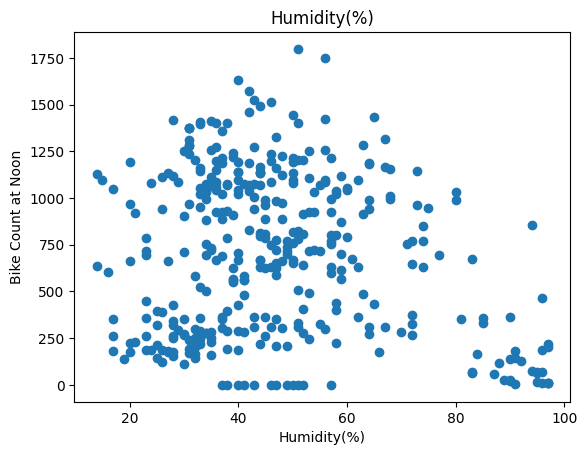

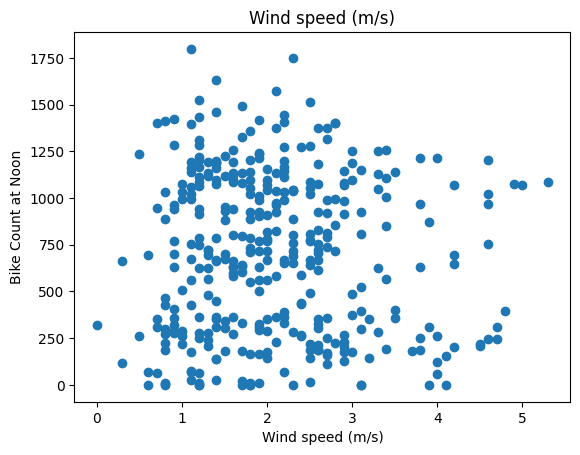

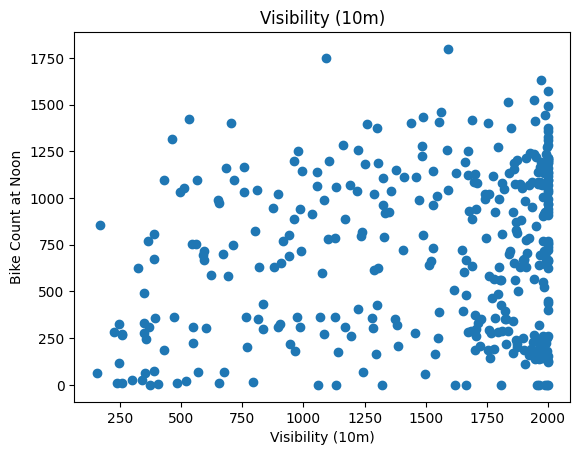

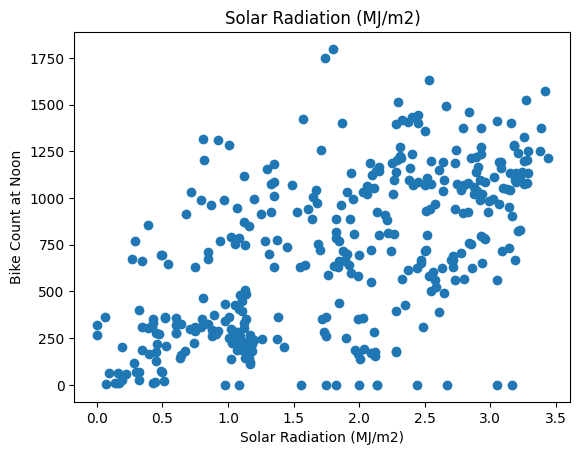

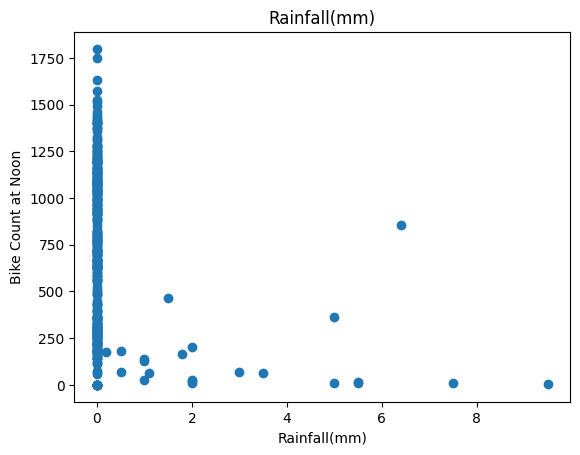

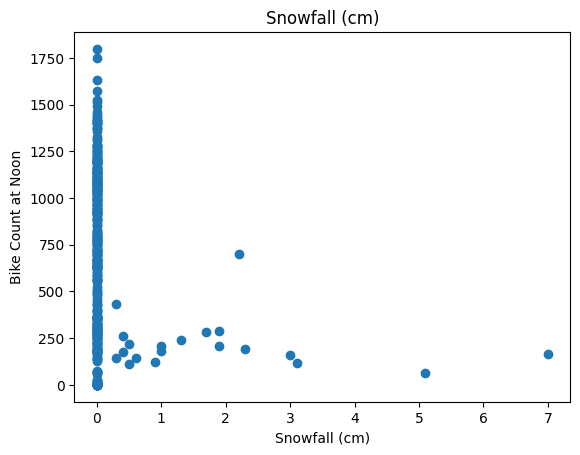

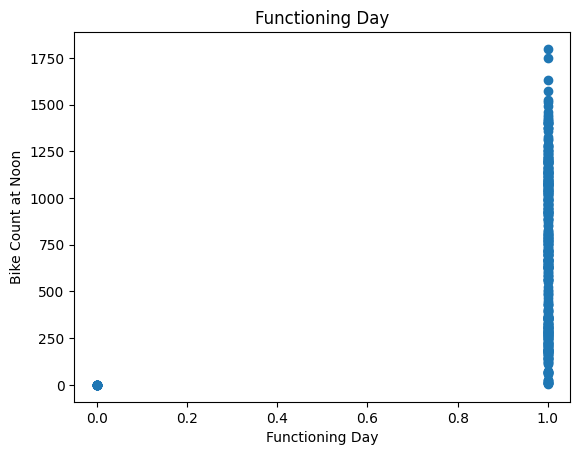

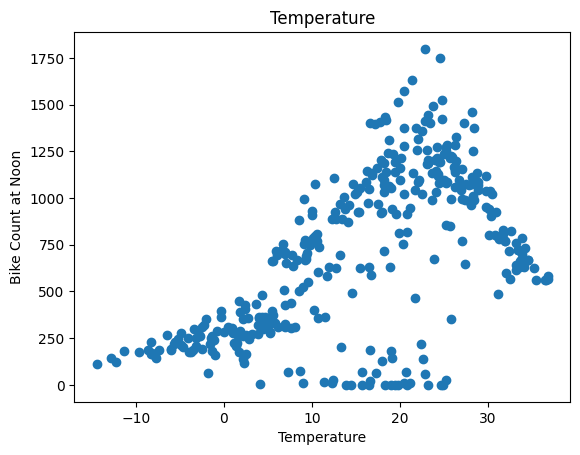

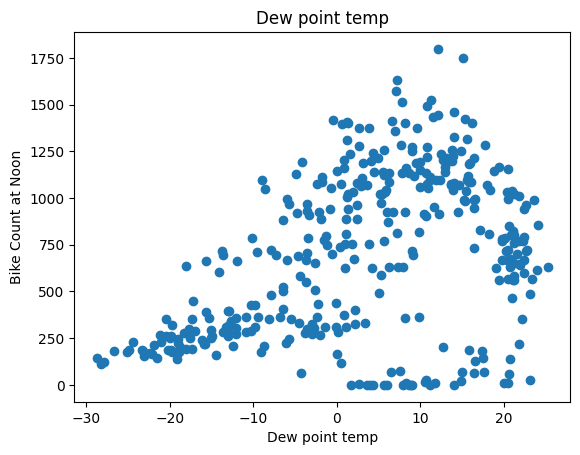

In [21]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["Rented Bike Count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Bike Count at Noon")
    plt.show()

In [22]:
#Based on the graph we can drop additonal columns that don't affect bike count for example functional doesn't affect bike count
"""
Keep in mind bike count doesn't appear linear with respect to some of these feature vectors. Keep in mind for neural networks
"""

"\nKeep in mind bike count doesn't appear linear with respect to some of these feature vectors. Keep in mind for neural networks\n"

In [23]:
df = df.drop(["Functioning Day", "Visibility (10m)", "Wind speed (m/s)"], axis=1)
df

,Rented Bike Count,Humidity(%),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Temperature,Dew point temp
12,449,23,1.11,0.0,0.0,1.7,-17.2
36,479,41,1.09,0.0,0.0,4.3,-7.8
60,333,85,0.43,0.0,0.0,5.8,3.4
84,393,38,1.11,0.0,0.0,-0.3,-12.9
108,321,25,0.00,0.0,0.0,-2.3,-19.7
...,...,...,...,...,...,...,...
8652,752,57,1.69,0.0,0.0,9.1,1.0
8676,672,61,0.85,0.0,0.0,9.3,2.1
8700,635,14,1.81,0.0,0.0,7.9,-18.0
8724,661,27,0.34,0.0,0.0,5.6,-11.9


In [24]:
df.columns

Index(['Rented Bike Count', 'Humidity(%)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Temperature', 'Dew point temp'],
      dtype='object')

In [25]:
column_rename_list = ['bike_count', 'humidity', 'radiation',
       'rain', 'snow', 'temperature', 'dew_point_temp']

In [26]:
df.columns =column_rename_list 

In [27]:
df.reset_index(inplace=True)
df

,index,bike_count,humidity,radiation,rain,snow,temperature,dew_point_temp
0,12,449,23,1.11,0.0,0.0,1.7,-17.2
1,36,479,41,1.09,0.0,0.0,4.3,-7.8
2,60,333,85,0.43,0.0,0.0,5.8,3.4
3,84,393,38,1.11,0.0,0.0,-0.3,-12.9
4,108,321,25,0.00,0.0,0.0,-2.3,-19.7
...,...,...,...,...,...,...,...,...
360,8652,752,57,1.69,0.0,0.0,9.1,1.0
361,8676,672,61,0.85,0.0,0.0,9.3,2.1
362,8700,635,14,1.81,0.0,0.0,7.9,-18.0
363,8724,661,27,0.34,0.0,0.0,5.6,-11.9


In [28]:
#saving the df to be used for modelling
df.to_csv("/home/rads-a-dev/Desktop/projects/ml_projects/seoul_bikes_project/data_folder/usable_bike_data.csv", index=False)